In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
import glob
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
damage_train=glob.glob('train_another/damage/*.jpeg')
no_damage_train=glob.glob('train_another/no_damage/*.jpeg')

In [3]:
damage_test=glob.glob('test_another/damage/*.jpeg')
no_damage_test=glob.glob('test_another/no_damage/*.jpeg')

In [4]:
print("Number of images in Training are, damage:",len(damage_train),",no_damage:",len(no_damage_train))
print("Number of images in Testing are, damage:",len(damage_test),",no_damage:",len(no_damage_test))

Number of images in Training are, damage: 5000 ,no_damage: 5000
Number of images in Testing are, damage: 8000 ,no_damage: 1000


In [5]:
image_train=[]
label_train=[]

for i in damage_train:
    img=plt.imread(i)
    image_train.append(img)
    label_train.append(0)
    

for i in no_damage_train:
    img=plt.imread(i)
    image_train.append(img)
    label_train.append(1)

In [6]:
image_test=[]
label_test=[]

for i in damage_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(0)
    

for i in no_damage_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [7]:
image_train,label_train=shuffle(image_train,label_train,random_state=100)
image_test,label_test=shuffle(image_test,label_test,random_state=100)

In [8]:
label_name={0:'damage',1:'no_damage'}

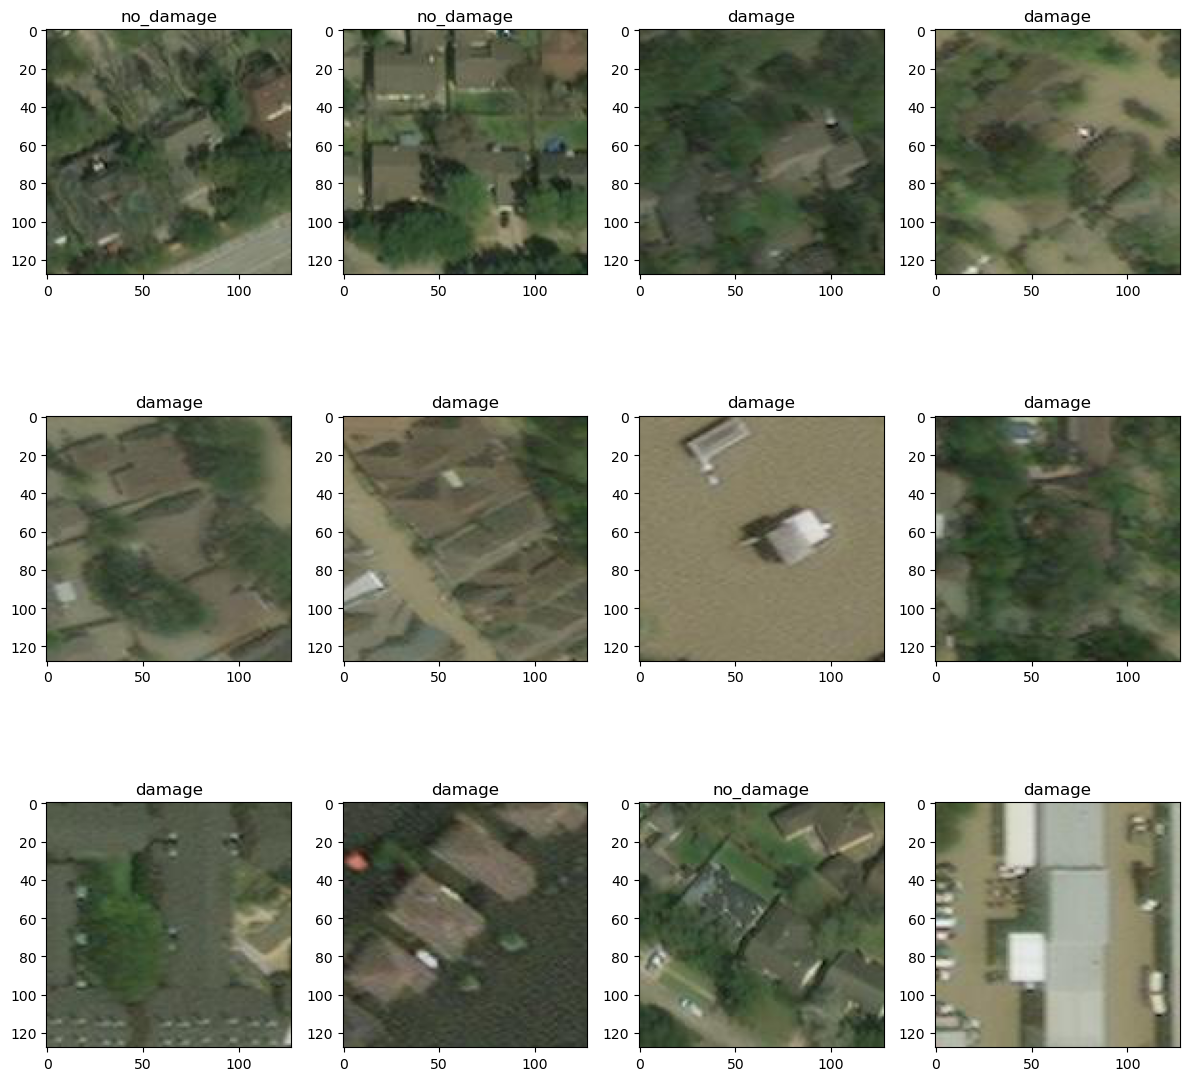

In [9]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_train[i])
    plt.title(label_name[label_train[i]])
plt.tight_layout()

In [10]:
X_train=[]
for i in image_train:
    X_train.append(resize(i,(224,224,3)))

In [11]:
X_test=[]
for i in image_test:
    X_test.append(resize(i,(224,224,3)))

In [12]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [13]:
y_train=np.array(label_train)
y_test=np.array(label_test)

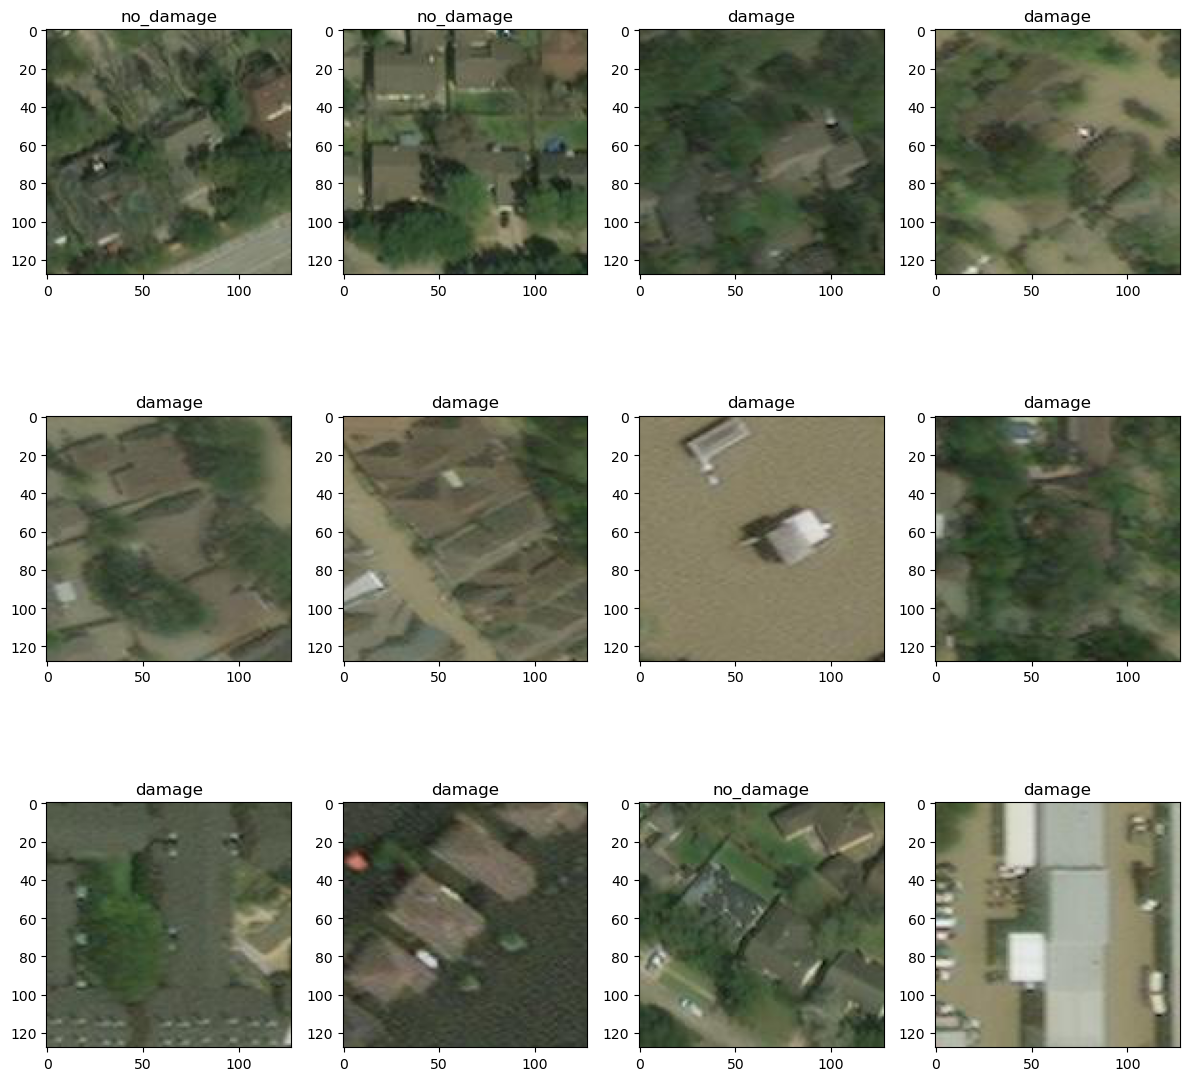

In [14]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_train[i])
    plt.title(label_name[label_train[i]])
plt.tight_layout()

In [15]:
print("Shape of X_train is:",X_train.shape)
print("Shape of X_test is:",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is:",y_test.shape)

Shape of X_train is: (10000, 224, 224, 3)
Shape of X_test is: (9000, 224, 224, 3)
Shape of y_train is: (10000,)
Shape of y_test is: (9000,)


In [29]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 93312)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [33]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
282/282 [==============================] - 135s 471ms/step - loss: 0.5428 - accuracy: 0.7496 - val_loss: 0.3455 - val_accuracy: 0.8800
Epoch 2/10
282/282 [==============================] - 123s 437ms/step - loss: 0.3482 - accuracy: 0.8636 - val_loss: 0.2897 - val_accuracy: 0.8870
Epoch 3/10
282/282 [==============================] - 119s 424ms/step - loss: 0.2364 - accuracy: 0.9070 - val_loss: 0.1884 - val_accuracy: 0.9230
Epoch 4/10
282/282 [==============================] - 121s 431ms/step - loss: 0.1948 - accuracy: 0.9239 - val_loss: 0.2326 - val_accuracy: 0.9050
Epoch 5/10
282/282 [==============================] - 121s 427ms/step - loss: 0.1334 - accuracy: 0.9494 - val_loss: 0.1933 - val_accuracy: 0.9230
Epoch 6/10
282/282 [==============================] - 120s 424ms/step - loss: 0.1006 - accuracy: 0.9631 - val_loss: 0.1473 - val_accuracy: 0.9450
Epoch 7/10
282/282 [==============================] - 120s 424ms/step - loss: 0.0829 - accuracy: 0.9709 - val_loss: 0.1647 -

In [34]:
model.evaluate(X_train, y_train)

313/313 [==============================] - 35s 110ms/step - loss: 0.0359 - accuracy: 0.9911


[0.035903435200452805, 0.991100013256073]

In [36]:
y_pred=model.predict(X_test)

282/282 [==============================] - 33s 95ms/step


In [39]:
y_pred

array([[0.00191799],
       [0.41209143],
       [0.01333868],
       ...,
       [0.99993986],
       [0.00128265],
       [0.00245894]], dtype=float32)

In [40]:
y_pred=[1 if i >0.5 else 0 for i in y_pred]

In [41]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [46]:
accuracy_score(y_test,y_pred)

0.9341111111111111

<Axes: >

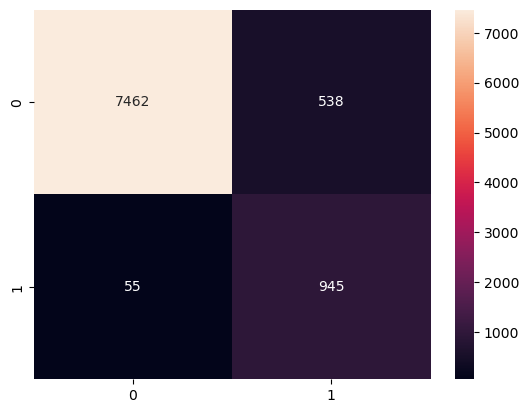

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8000
           1       0.64      0.94      0.76      1000

    accuracy                           0.93      9000
   macro avg       0.81      0.94      0.86      9000
weighted avg       0.95      0.93      0.94      9000

